In [11]:
from datasets import LungDataset, LungInfectedDataset, LungCovidDataset
from utils import make_model, test_model, load_model

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

### Normal/Infected Classifier

In [2]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=5, translate=(0.1, 0)),
    transforms.RandomResizedCrop((150, 150), scale=(0.9, 1.0), ratio=(0.9, 1.1)),
])

dataloader_args = {
    'dataset_cls'    : LungInfectedDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'batch_size'     : 64,
    'num_samples'    : 64 * 100,
}

# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 32,
    'block_config'      : (6, 12, 24, 16),
    'num_init_features' : 64,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 2,
}

# Define training arguments
training_args = {
    'device'       :'cuda',
    'optimizer'    : 'Adam',
    'learning_rate': 0.0001,
    'patience'     : 20,
    'model_path'   : './models/dual-binary-classifier-1.pt',
    'history_path' : './history/dual-binary-classifier-1.pickle',
}

[Tue Mar 23 23:18:05 2021] Training started



[Tue Mar 23 23:18:28 2021] Time elapsed: 0:23 - loss: 0.115 - acc: 0.934 - recall: 0.970 - f1: 0.966 - test_loss: 0.310 - test_acc: 0.785 - test_recall: 0.888 - test_f1: 0.875



[Tue Mar 23 23:18:50 2021] Time elapsed: 0:45 - loss: 0.054 - acc: 0.962 - recall: 0.981 - f1: 0.981 - test_loss: 0.431 - test_acc: 0.724 - test_recall: 0.871 - test_f1: 0.840



[Tue Mar 23 23:19:13 2021] Time elapsed: 1:08 - loss: 0.037 - acc: 0.974 - recall: 0.988 - f1: 0.987 - test_loss: 0.286 - test_acc: 0.812 - test_recall: 0.905 - test_f1: 0.894



[Tue Mar 23 23:19:35 2021] Time elapsed: 1:30 - loss: 0.032 - acc: 0.976 - recall: 0.988 - f1: 0.988 - test_loss: 0.325 - test_acc: 0.810 - test_recall: 0.907 - test_f1: 0.896



[Tue Mar 23 23:19:57 2021] Time elapsed: 1:52 - loss: 0.034 - acc: 0.977 - recall: 0.989 - f1: 0.989 - test_loss: 0.255 - test_acc: 0.835 - test_recall: 0.921 - test_f1: 0.912



[Tue Mar 23 23:20:20 2021] Time elapsed: 2:14 - loss: 0.025 - acc: 0.983 - recall: 0.992 - f1: 0.992 - test_loss: 0.228 - test_acc: 0.874 - test_recall: 0.934 - test_f1: 0.930



[Tue Mar 23 23:20:42 2021] Time elapsed: 2:37 - loss: 0.028 - acc: 0.980 - recall: 0.991 - f1: 0.990 - test_loss: 0.413 - test_acc: 0.774 - test_recall: 0.892 - test_f1: 0.873



[Tue Mar 23 23:21:04 2021] Time elapsed: 2:59 - loss: 0.021 - acc: 0.987 - recall: 0.994 - f1: 0.994 - test_loss: 0.275 - test_acc: 0.834 - test_recall: 0.917 - test_f1: 0.909



[Tue Mar 23 23:21:26 2021] Time elapsed: 3:21 - loss: 0.025 - acc: 0.982 - recall: 0.991 - f1: 0.991 - test_loss: 0.361 - test_acc: 0.807 - test_recall: 0.908 - test_f1: 0.895



[Tue Mar 23 23:21:48 2021] Time elapsed: 3:43 - loss: 0.024 - acc: 0.982 - recall: 0.991 - f1: 0.991 - test_loss: 0.233 - test_acc: 0.859 - test_recall: 0.932 - test_f1: 0.926



[Tue Mar 23 23:22:10 2021] Time elapsed: 4:05 - loss: 0.024 - acc: 0.984 - recall: 0.992 - f1: 0.992 - test_loss: 0.322 - test_acc: 0.821 - test_recall: 0.910 - test_f1: 0.901



[Tue Mar 23 23:22:33 2021] Time elapsed: 4:28 - loss: 0.016 - acc: 0.990 - recall: 0.995 - f1: 0.995 - test_loss: 0.254 - test_acc: 0.865 - test_recall: 0.934 - test_f1: 0.929



[Tue Mar 23 23:22:56 2021] Time elapsed: 4:50 - loss: 0.018 - acc: 0.987 - recall: 0.994 - f1: 0.994 - test_loss: 0.308 - test_acc: 0.848 - test_recall: 0.923 - test_f1: 0.916



[Tue Mar 23 23:23:18 2021] Time elapsed: 5:12 - loss: 0.016 - acc: 0.989 - recall: 0.995 - f1: 0.995 - test_loss: 0.372 - test_acc: 0.819 - test_recall: 0.913 - test_f1: 0.902



[Tue Mar 23 23:23:39 2021] Time elapsed: 5:34 - loss: 0.018 - acc: 0.988 - recall: 0.994 - f1: 0.994 - test_loss: 0.554 - test_acc: 0.728 - test_recall: 0.873 - test_f1: 0.842



[Tue Mar 23 23:24:01 2021] Time elapsed: 5:56 - loss: 0.015 - acc: 0.989 - recall: 0.995 - f1: 0.995 - test_loss: 0.390 - test_acc: 0.793 - test_recall: 0.901 - test_f1: 0.885



[Tue Mar 23 23:24:23 2021] Time elapsed: 6:18 - loss: 0.017 - acc: 0.988 - recall: 0.994 - f1: 0.994 - test_loss: 0.430 - test_acc: 0.793 - test_recall: 0.901 - test_f1: 0.886



[Tue Mar 23 23:24:45 2021] Time elapsed: 6:40 - loss: 0.014 - acc: 0.990 - recall: 0.995 - f1: 0.995 - test_loss: 0.300 - test_acc: 0.848 - test_recall: 0.924 - test_f1: 0.917



[Tue Mar 23 23:25:08 2021] Time elapsed: 7:02 - loss: 0.013 - acc: 0.992 - recall: 0.996 - f1: 0.996 - test_loss: 0.472 - test_acc: 0.782 - test_recall: 0.895 - test_f1: 0.878



[Tue Mar 23 23:25:30 2021] Time elapsed: 7:25 - loss: 0.013 - acc: 0.990 - recall: 0.995 - f1: 0.996 - test_loss: 0.378 - test_acc: 0.822 - test_recall: 0.916 - test_f1: 0.905



[Tue Mar 23 23:25:53 2021] Time elapsed: 7:47 - loss: 0.012 - acc: 0.992 - recall: 0.996 - f1: 0.996 - test_loss: 0.364 - test_acc: 0.838 - test_recall: 0.924 - test_f1: 0.915



[Tue Mar 23 23:26:15 2021] Time elapsed: 8:10 - loss: 0.011 - acc: 0.992 - recall: 0.996 - f1: 0.996 - test_loss: 0.486 - test_acc: 0.803 - test_recall: 0.907 - test_f1: 0.893



[Tue Mar 23 23:26:37 2021] Time elapsed: 8:32 - loss: 0.008 - acc: 0.994 - recall: 0.997 - f1: 0.997 - test_loss: 0.335 - test_acc: 0.829 - test_recall: 0.919 - test_f1: 0.909



[Tue Mar 23 23:27:01 2021] Time elapsed: 8:55 - loss: 0.013 - acc: 0.991 - recall: 0.996 - f1: 0.996 - test_loss: 0.425 - test_acc: 0.806 - test_recall: 0.911 - test_f1: 0.896



[Tue Mar 23 23:27:23 2021] Time elapsed: 9:18 - loss: 0.014 - acc: 0.990 - recall: 0.996 - f1: 0.995 - test_loss: 0.482 - test_acc: 0.775 - test_recall: 0.894 - test_f1: 0.874



[Tue Mar 23 23:27:46 2021] Time elapsed: 9:40 - loss: 0.010 - acc: 0.993 - recall: 0.997 - f1: 0.997 - test_loss: 0.311 - test_acc: 0.867 - test_recall: 0.931 - test_f1: 0.927
Early stopping activated at epoch 26 - Minimum test loss was 0.228 at epoch 6

[Tue Mar 23 23:27:46 2021] Training complete - Time elapsed: 9:40


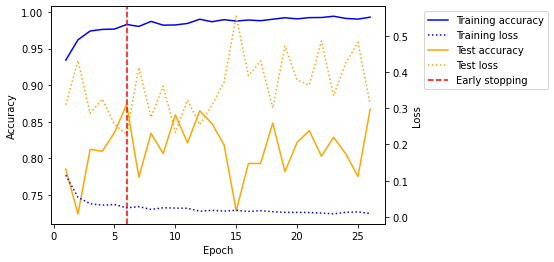

In [3]:
# Create, train, and save model
model = make_model(dataloader_args, model_args, training_args)

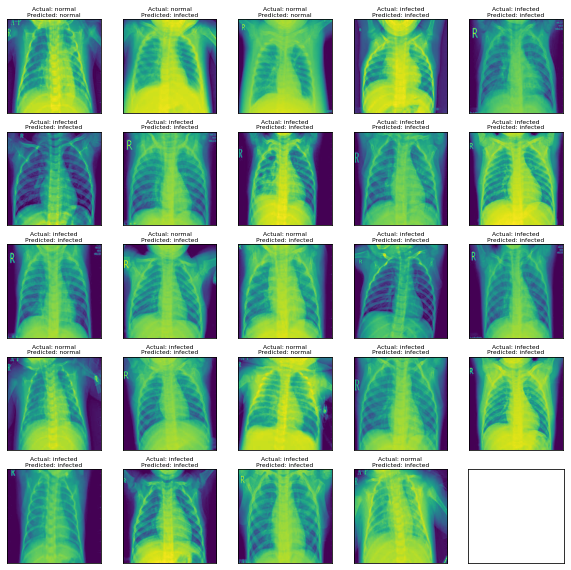

Validation loss: 0.202 - Validation accuracy: 0.833 - Validation F1-score: 0.915 - Validation recall: 0.926


In [4]:
# Evaluate the performance of the model on the validation set
test_model(dataloader_args, training_args)

### Non-Covid/Covid Classifier

In [5]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=5, translate=(0.1, 0)),
    transforms.RandomResizedCrop((150, 150), scale=(0.9, 1.0), ratio=(0.9, 1.1)),
])

dataloader_args = {
    'dataset_cls'    : LungCovidDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'batch_size'     : 64,
    'num_samples'    : 64 * 100,
}

# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 32,
    'block_config'      : (6, 12, 32, 32),
    'num_init_features' : 64,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 2,
}

# Define training arguments
training_args = {
    'device'       :'cuda',
    'optimizer'    : 'Adam',
    'learning_rate': 0.0001,
    'patience'     : 20,
    'model_path'   : './models/dual-binary-classifier-2.pt',
    'history_path' : './history/dual-binary-classifier-2.pickle',
}

[Tue Mar 23 23:27:58 2021] Training started



[Tue Mar 23 23:28:25 2021] Time elapsed: 0:27 - loss: 0.358 - acc: 0.788 - recall: 0.864 - f1: 0.826 - test_loss: 0.319 - test_acc: 0.771 - test_recall: 0.849 - test_f1: 0.821



[Tue Mar 23 23:28:52 2021] Time elapsed: 0:54 - loss: 0.329 - acc: 0.799 - recall: 0.871 - f1: 0.839 - test_loss: 0.360 - test_acc: 0.737 - test_recall: 0.829 - test_f1: 0.790



[Tue Mar 23 23:29:20 2021] Time elapsed: 1:21 - loss: 0.302 - acc: 0.821 - recall: 0.884 - f1: 0.859 - test_loss: 0.421 - test_acc: 0.698 - test_recall: 0.804 - test_f1: 0.745



[Tue Mar 23 23:29:47 2021] Time elapsed: 1:48 - loss: 0.302 - acc: 0.815 - recall: 0.879 - f1: 0.855 - test_loss: 0.259 - test_acc: 0.844 - test_recall: 0.900 - test_f1: 0.889



[Tue Mar 23 23:30:14 2021] Time elapsed: 2:16 - loss: 0.286 - acc: 0.829 - recall: 0.887 - f1: 0.870 - test_loss: 0.313 - test_acc: 0.798 - test_recall: 0.867 - test_f1: 0.848



[Tue Mar 23 23:30:42 2021] Time elapsed: 2:44 - loss: 0.274 - acc: 0.838 - recall: 0.893 - f1: 0.877 - test_loss: 0.399 - test_acc: 0.719 - test_recall: 0.819 - test_f1: 0.770



[Tue Mar 23 23:31:09 2021] Time elapsed: 3:10 - loss: 0.269 - acc: 0.838 - recall: 0.893 - f1: 0.878 - test_loss: 0.480 - test_acc: 0.715 - test_recall: 0.813 - test_f1: 0.766



[Tue Mar 23 23:31:36 2021] Time elapsed: 3:37 - loss: 0.265 - acc: 0.841 - recall: 0.895 - f1: 0.880 - test_loss: 0.384 - test_acc: 0.737 - test_recall: 0.831 - test_f1: 0.791



[Tue Mar 23 23:32:02 2021] Time elapsed: 4:04 - loss: 0.244 - acc: 0.858 - recall: 0.905 - f1: 0.894 - test_loss: 0.342 - test_acc: 0.770 - test_recall: 0.852 - test_f1: 0.824



[Tue Mar 23 23:32:29 2021] Time elapsed: 4:31 - loss: 0.231 - acc: 0.866 - recall: 0.909 - f1: 0.900 - test_loss: 0.402 - test_acc: 0.751 - test_recall: 0.838 - test_f1: 0.805



[Tue Mar 23 23:32:56 2021] Time elapsed: 4:58 - loss: 0.237 - acc: 0.864 - recall: 0.907 - f1: 0.899 - test_loss: 0.217 - test_acc: 0.913 - test_recall: 0.939 - test_f1: 0.937



[Tue Mar 23 23:33:24 2021] Time elapsed: 5:25 - loss: 0.208 - acc: 0.885 - recall: 0.923 - f1: 0.916 - test_loss: 0.320 - test_acc: 0.813 - test_recall: 0.871 - test_f1: 0.858



[Tue Mar 23 23:33:50 2021] Time elapsed: 5:52 - loss: 0.200 - acc: 0.887 - recall: 0.924 - f1: 0.918 - test_loss: 0.270 - test_acc: 0.884 - test_recall: 0.906 - test_f1: 0.905



[Tue Mar 23 23:34:18 2021] Time elapsed: 6:20 - loss: 0.180 - acc: 0.902 - recall: 0.934 - f1: 0.929 - test_loss: 0.331 - test_acc: 0.819 - test_recall: 0.877 - test_f1: 0.865



[Tue Mar 23 23:34:45 2021] Time elapsed: 6:47 - loss: 0.184 - acc: 0.895 - recall: 0.928 - f1: 0.924 - test_loss: 0.251 - test_acc: 0.871 - test_recall: 0.903 - test_f1: 0.900



[Tue Mar 23 23:35:12 2021] Time elapsed: 7:14 - loss: 0.172 - acc: 0.907 - recall: 0.934 - f1: 0.932 - test_loss: 0.272 - test_acc: 0.869 - test_recall: 0.912 - test_f1: 0.905



[Tue Mar 23 23:35:39 2021] Time elapsed: 7:41 - loss: 0.153 - acc: 0.917 - recall: 0.942 - f1: 0.940 - test_loss: 0.394 - test_acc: 0.794 - test_recall: 0.864 - test_f1: 0.846



[Tue Mar 23 23:36:06 2021] Time elapsed: 8:08 - loss: 0.148 - acc: 0.920 - recall: 0.945 - f1: 0.943 - test_loss: 0.386 - test_acc: 0.813 - test_recall: 0.871 - test_f1: 0.858



[Tue Mar 23 23:36:33 2021] Time elapsed: 8:35 - loss: 0.142 - acc: 0.919 - recall: 0.943 - f1: 0.941 - test_loss: 0.262 - test_acc: 0.887 - test_recall: 0.910 - test_f1: 0.909



[Tue Mar 23 23:37:00 2021] Time elapsed: 9:02 - loss: 0.121 - acc: 0.935 - recall: 0.955 - f1: 0.953 - test_loss: 0.380 - test_acc: 0.814 - test_recall: 0.877 - test_f1: 0.862



[Tue Mar 23 23:37:27 2021] Time elapsed: 9:29 - loss: 0.117 - acc: 0.938 - recall: 0.956 - f1: 0.955 - test_loss: 0.452 - test_acc: 0.781 - test_recall: 0.835 - test_f1: 0.826



[Tue Mar 23 23:37:54 2021] Time elapsed: 9:56 - loss: 0.110 - acc: 0.943 - recall: 0.960 - f1: 0.959 - test_loss: 0.441 - test_acc: 0.821 - test_recall: 0.877 - test_f1: 0.865



[Tue Mar 23 23:38:21 2021] Time elapsed: 10:23 - loss: 0.113 - acc: 0.943 - recall: 0.960 - f1: 0.959 - test_loss: 0.381 - test_acc: 0.821 - test_recall: 0.866 - test_f1: 0.859



[Tue Mar 23 23:38:48 2021] Time elapsed: 10:49 - loss: 0.097 - acc: 0.950 - recall: 0.964 - f1: 0.964 - test_loss: 0.357 - test_acc: 0.845 - test_recall: 0.883 - test_f1: 0.879



[Tue Mar 23 23:39:15 2021] Time elapsed: 11:16 - loss: 0.083 - acc: 0.958 - recall: 0.969 - f1: 0.969 - test_loss: 0.286 - test_acc: 0.890 - test_recall: 0.914 - test_f1: 0.913



[Tue Mar 23 23:39:42 2021] Time elapsed: 11:43 - loss: 0.081 - acc: 0.960 - recall: 0.971 - f1: 0.971 - test_loss: 0.538 - test_acc: 0.831 - test_recall: 0.859 - test_f1: 0.859



[Tue Mar 23 23:40:09 2021] Time elapsed: 12:10 - loss: 0.076 - acc: 0.961 - recall: 0.972 - f1: 0.971 - test_loss: 0.402 - test_acc: 0.827 - test_recall: 0.872 - test_f1: 0.865



[Tue Mar 23 23:40:36 2021] Time elapsed: 12:37 - loss: 0.069 - acc: 0.968 - recall: 0.977 - f1: 0.977 - test_loss: 0.355 - test_acc: 0.869 - test_recall: 0.904 - test_f1: 0.900



[Tue Mar 23 23:41:02 2021] Time elapsed: 13:04 - loss: 0.059 - acc: 0.970 - recall: 0.979 - f1: 0.979 - test_loss: 0.422 - test_acc: 0.858 - test_recall: 0.899 - test_f1: 0.893



[Tue Mar 23 23:41:29 2021] Time elapsed: 13:31 - loss: 0.076 - acc: 0.963 - recall: 0.973 - f1: 0.973 - test_loss: 0.332 - test_acc: 0.874 - test_recall: 0.901 - test_f1: 0.900



[Tue Mar 23 23:41:56 2021] Time elapsed: 13:57 - loss: 0.049 - acc: 0.976 - recall: 0.983 - f1: 0.983 - test_loss: 0.455 - test_acc: 0.834 - test_recall: 0.870 - test_f1: 0.867
Early stopping activated at epoch 31 - Minimum test loss was 0.217 at epoch 11

[Tue Mar 23 23:41:56 2021] Training complete - Time elapsed: 13:57


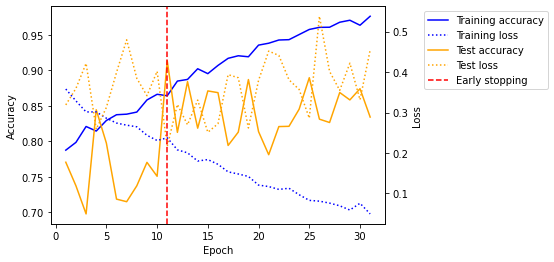

In [6]:
# Create, train, and save model
model = make_model(dataloader_args, model_args, training_args)

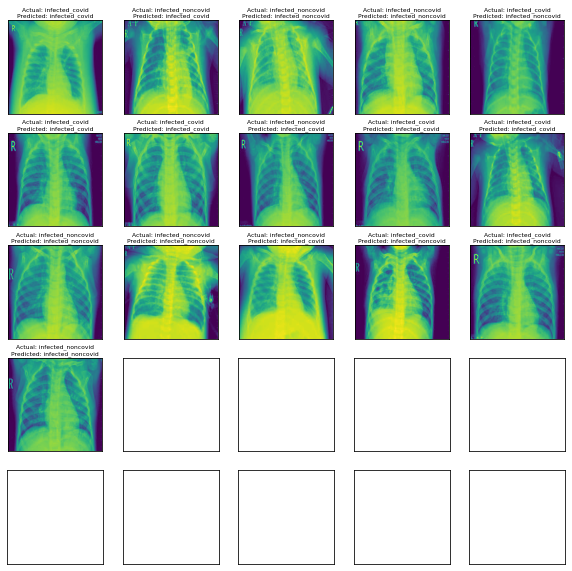

Validation loss: 2.172 - Validation accuracy: 0.625 - Validation F1-score: 0.634 - Validation recall: 0.625


In [7]:
# Evaluate the performance of the model on the validation set
test_model(dataloader_args, training_args)

### Dual Binary Classifier

In [13]:
# Define dual binary classifier architecture
class DualBinaryClassifier(nn.Module):
    def __init__(self, model1_path, model2_path):
        super().__init__()
        self.model1 = load_model(model1_path)
        self.model2 = load_model(model2_path)
        self.device = self.model2.device
        self.to(self.device)
    
    def forward(self, x):
        logits = self.model1(x)
        output = F.log_softmax(logits, dim=1)
        infected = (torch.exp(output).max(dim=1)[1] == 1)
        
        new_logits = torch.zeros((logits.shape[0], logits.shape[1]+1)).to(self.device)
        new_logits[:, :-1] = logits
        new_logits[:, 0][infected] = 0
        new_logits[:, 1:][infected] = self.model2(x[infected])
        return new_logits

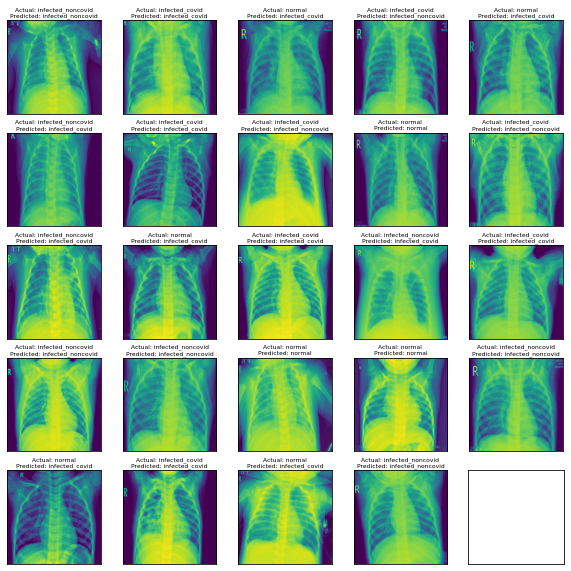

Validation loss: 2.085 - Validation accuracy: 0.542 - Validation F1-score: 0.582 - Validation recall: 0.561


In [14]:
# Create and test dual binary classifier
model = DualBinaryClassifier(model1_path='./models/dual-binary-classifier-1.pt',
                             model2_path='./models/dual-binary-classifier-2.pt')

dataloader_args = {
    'dataset_cls'    : LungDataset,
    'root_dir'       : './dataset',
    'batch_size'     : 64,
}

test_model(dataloader_args, training_args=None, model=model)